In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib_venn import venn3
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import import_homer_diffgene, read_homer_gene_exp, read_annotated_peaks
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/WL03_Strains_CCl4_6weeks_WholeLiver_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/CCl4_6week_wholeliver/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Check qc stats

In [3]:
qc = ngs_qc(dataDirectory)

/home/h1bennet/strains/data/RNA/CCl4_6week_wholeliver//
./CCl4_6week_wholeliver_qc/


/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsm

<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
NCoRWT_Liver_RNA_polyA_CCl4_6wk_PlusActD_LN159aM_JSS_TDT_16_06_06.c57bl6j.star_shifted_from_C57BL6J.sam,4428584.0,75.0,0.004917,3.022,2.721874e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCoRWT_Liver_RNA_polyA_CCl4_6wk_PlusActD_LN159bM_JSS_TDT_16_06_06.c57bl6j.star_shifted_from_C57BL6J.sam,4803659.0,75.0,0.005024,2.847,2.721924e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aj_Liver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj10_TDT_JSS_20160531.aj.star_shifted_from_AJ.sam,3365409.0,75.0,0.007224,5.841,2.721224e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aj_Liver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_aj7_TDT_JSS_20160531.aj.star_shifted_from_AJ.sam,3500520.0,75.0,0.006215,4.831,2.720967e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
balbc_Liver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb12_TDT_JSS_20160531.balbcj.star_shifted_from_BALBCJ.sam,3251469.0,75.0,0.006390,5.348,2.721397e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
balbc_Liver_RNA_polyA_CCl4_6wk_noRecovery_Flavopiridol_balb5_TDT_JSS_20160610.balbcj.star_shifted_from_BALBCJ.sam,3686267.0,75.0,0.005665,4.181,2.720680e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [5]:
c57_paths = list(np.sort(glob.glob(dataDirectory+'/NCoRWT*')))
balbc_paths = list(np.sort(glob.glob(dataDirectory+'/balb*')))
aj_paths = list(np.sort(glob.glob(dataDirectory+'/aj*')))

In [6]:
c57_ids = [i.split('/')[-1].split('_')[7] for i in c57_paths]
balbc_ids = [i.split('/')[-1].split('_')[8] for i in balbc_paths]
aj_ids = [i.split('/')[-1].split('_')[8] for i in aj_paths]

In [7]:
ids = ['c57_wholeliver_ccl4_6weeks',
       'balbc_wholeliver_ccl4_6weeks',
       'aj_wholeliver_ccl4_6weeks']
colors = ['#006d2c',
          '#08519c',
          '#a50f15']
paths = [';'.join(c57_paths),
         ';'.join(balbc_paths),
         ';'.join(aj_paths)]
short_ids = [';'.join([ids[0]+'_'+i for i in c57_ids]),
             ';'.join([ids[1]+'_'+i for i in balbc_ids]),
             ';'.join([ids[2]+'_'+i for i in aj_ids])]

In [8]:
short_ids

['c57_wholeliver_ccl4_6weeks_LN159aM;c57_wholeliver_ccl4_6weeks_LN159bM',
 'balbc_wholeliver_ccl4_6weeks_balb12;balbc_wholeliver_ccl4_6weeks_balb5',
 'aj_wholeliver_ccl4_6weeks_aj10;aj_wholeliver_ccl4_6weeks_aj7']

In [9]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

### Make sure to check the PCA pdf file for outliers

# Import differential gene files for examination and plotting

## Write differential genes to list for metascape

In [10]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [11]:
strains = ['aj', 'balb', 'c57']
log2fc = np.log2(2)
padj = 0.05

In [12]:
gene_list_dict ={}

In [13]:
for strain in strains:
    # initialize gene lists
    g_intersect = set()
    g_union = set()
    for i in glob.glob('./differential/'+strain+'*homer.txt'):
        print(i)
        # read in gene expression data
        df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
            depath=i,
            gepath='./expression/HOMER.rawTPM.txt',
            gene_name_index=True)

        # select differential genes
        df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
        sig_genes = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
        
        # add to sets
        if len(g_union) == 0:
            g_union = set(sig_genes)
            g_intersect = set(sig_genes)
        else:
            g_union = g_union.union(sig_genes)
            g_intersect = g_intersect.intersection(sig_genes)
        
        # print('union set length:', print(len(g_union)))
        # print('intersection set length:', print(len(g_intersect)))
    
    # after getting union and intersection sets add to dict
    gene_list_dict[strain+'_union'] = list(g_union)
    gene_list_dict[strain+'_intersection'] = list(g_intersect)
        

./differential/aj_wholeliver_ccl4_6weeks.vs.balbc_wholeliver_ccl4_6weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (6097, 14)
ge selected transcripts (6097, 13)
./differential/aj_wholeliver_ccl4_6weeks.vs.c57_wholeliver_ccl4_6weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (6346, 14)
ge selected transcripts (6346, 13)
./differential/balbc_wholeliver_ccl4_6weeks.vs.aj_wholeliver_ccl4_6weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (6097, 14)
ge selected transcripts (6097, 13)
./differential/balbc_wholeliver_ccl4_6weeks.vs.c57_wholeliver_ccl4_6weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (6402, 14)
ge selected transcripts (6402, 13)
./differential/c57_wholeliver_ccl4_6weeks.vs.balbc_wholeliver_ccl4_6weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (6402, 14)
ge selected transcripts (6402, 13)
./dif

In [14]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_wholeliver_amln_genes_fc_%.2f_pval_%.2f.txt' % (log2fc, padj), 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()


aj_union
197 genes
aj_intersection
28 genes
balb_union
192 genes
balb_intersection
22 genes
c57_union
254 genes
c57_intersection
80 genes


# Plot potential nichenet ligands

In [15]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

Read in raw expression values

In [16]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

In [28]:
tpm_mat.columns

Index(['c57_wholeliver_ccl4_6weeks_c57_wholeliver_ccl4_6weeks_LN159aM',
       'c57_wholeliver_ccl4_6weeks_c57_wholeliver_ccl4_6weeks_LN159bM',
       'balbc_wholeliver_ccl4_6weeks_balbc_wholeliver_ccl4_6weeks_balb12',
       'balbc_wholeliver_ccl4_6weeks_balbc_wholeliver_ccl4_6weeks_balb5',
       'aj_wholeliver_ccl4_6weeks_aj_wholeliver_ccl4_6weeks_aj10',
       'aj_wholeliver_ccl4_6weeks_aj_wholeliver_ccl4_6weeks_aj7'],
      dtype='object')

Read in nichenet ligand list

In [18]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

### Intersection gene set

In [19]:
act = []
for key in gene_list_dict.keys():
    if 'intersection' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

None of the strain unique genes are in the ligand list.

In [20]:
len(act_ligands)

2

In [21]:
# sns.clustermap(
#     np.log2(tpm_mat.loc[act_ligands]+1),
#     col_cluster=False,
#     #z_score=0,
#     cmap='Reds',
#     #vmin=-2,
#     vmax=8,
#     col_colors = ['#74c476', '#74c476', '#74c476',
#           '#6baed6', '#6baed6', '#6baed6',
#           '#de2d26', '#de2d26', '#de2d26'],
#     figsize=(4,6),
#     yticklabels=1)

# plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# # plt.close()

In [22]:
# sns.clustermap(
#     np.log2(tpm_mat.loc[act_ligands]+1),
#     col_cluster=False,
#     z_score=0,
#     cmap='RdBu_r',
#     vmin=-2,
#     vmax=2,
#     col_colors = ['#74c476', '#74c476', '#74c476',
#           '#6baed6', '#6baed6', '#6baed6',
#           '#de2d26', '#de2d26', '#de2d26'],
#     figsize=(4,6),
#     yticklabels=1)

# plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# # plt.close()

# Look at union gene set

In [23]:
act = []
for key in gene_list_dict.keys():
    if 'union' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

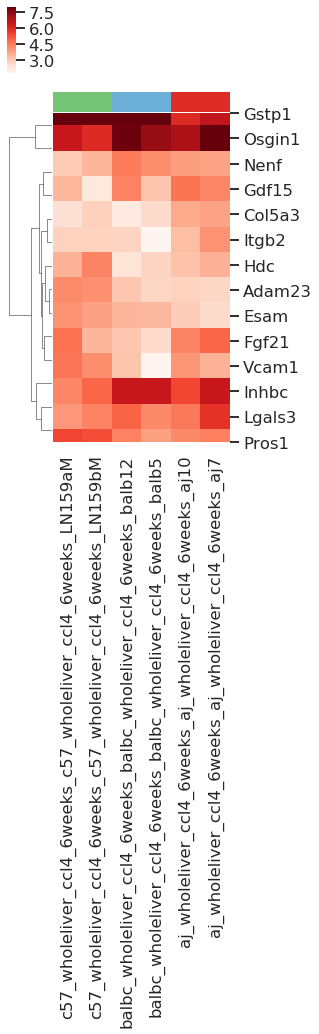

In [30]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476',
          '#6baed6', '#6baed6',
          '#de2d26', '#de2d26'],
    figsize=(4,8),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

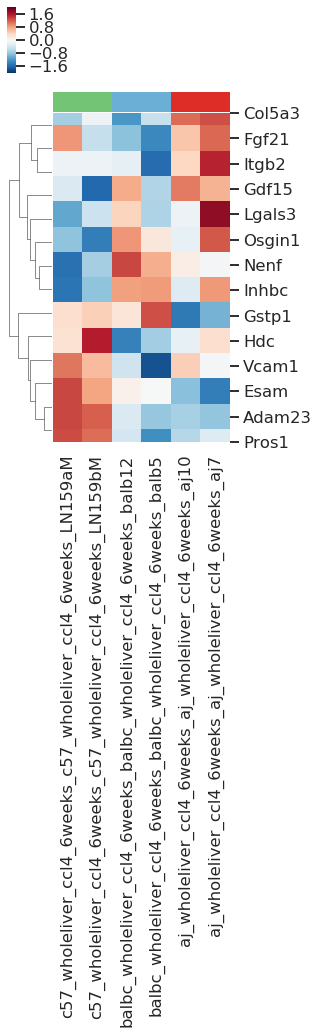

In [31]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476',
          '#6baed6', '#6baed6',
          '#de2d26', '#de2d26'],
    figsize=(4,8),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()

## Plot individual genes

In [32]:
groups = [[0,1],
          [2,3],
          [4,5]]

group_labels = ['C57BL/6J Whole Liver AMLN 30 weeks',
                'Balb/cJ Whole Liver AMLN 30 weeks',
                'AJ Whole Liver AMLN 30 weeks']

colors = ['#006d2c', '#08519c', '#a50f15']

legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

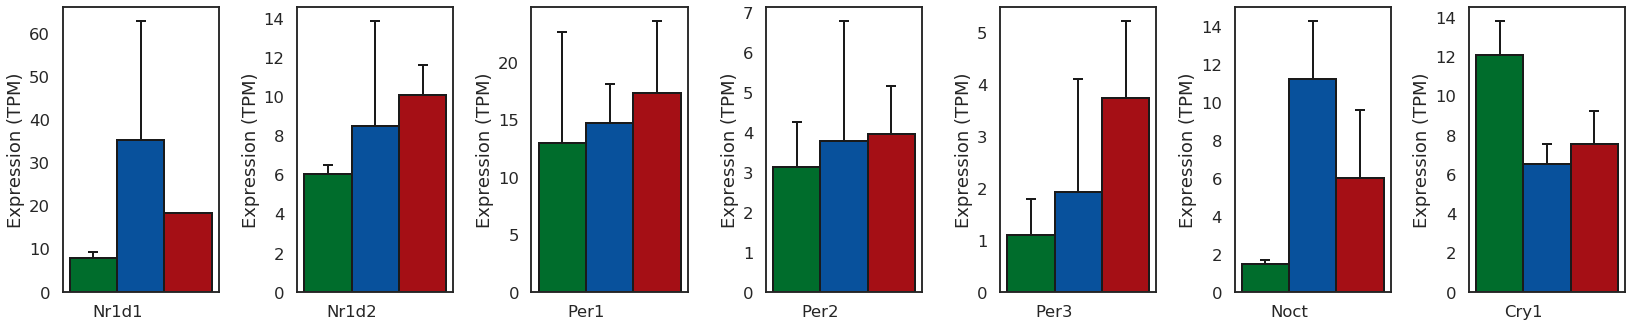

In [33]:
gene_list = ['Nr1d1', 'Nr1d2', 'Per1', 'Per2', 'Per3', 'Noct', 'Cry1']

fig, axs = plt.subplots(1, len(gene_list), figsize=(4*len(gene_list), 3*len(gene_list)/4))
plt.subplots_adjust(wspace=0.5)


for gene, ax in zip(gene_list, axs.flat):
    gene_list_bar_plot([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       width = 0.15,
                       ax=ax)

    ax.get_legend().remove()

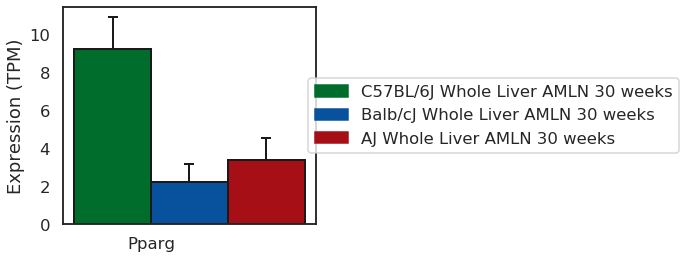

In [48]:
gene = 'Pparg'

fig, axs = plt.subplots(1, 2,
                       figsize=(10, 4))

gene_list_bar_plot([gene],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xticklabels('')
axs[1].set_yticklabels('')

plt.savefig('./figures/'+gene+'_tpm_barplot.png', bbox_inches='tight')

# Metascape analysis

In [49]:
def plot_top_terms_metascape(metascape_path, n_terms, color='#969696', ax=None):
    # read in df
    df = pd.read_excel(metascape_path,
                   sheet_name='Enrichment')
    df = df.loc[df['GroupID'].str.contains('Summary'), :]
    df = df.sort_values('LogP', ascending=True)
    
    # make plot
    if ax==None:
        fig, ax = plt.subplots(figsize=(4,4))

    ax.barh(range(n_terms),
           -df['LogP'].iloc[:n_terms],
           color=color,
           edgecolor='k')


    ax.set_yticks(range(n_terms))
    ax.set_yticklabels(df['Description'].iloc[:n_terms]);
    ax.set_ylim([n_terms-0.5,-0.5]);
    ax.set_xlabel('-log10(p-value)');

In [55]:
glob.glob('./gene_lists/*0.58*/metascape_result.xlsx')

['./gene_lists/balb_intersection_wholeliver_amln_genes_fc_0.58_pval_0.05/metascape_result.xlsx',
 './gene_lists/c57_intersection_wholeliver_amln_genes_fc_0.58_pval_0.05/metascape_result.xlsx',
 './gene_lists/aj_intersection_wholeliver_amln_genes_fc_0.58_pval_0.05/metascape_result.xlsx']

In [50]:
paths = np.sort(glob.glob('./gene_lists/*0.58*/metascape_result.xlsx'))
colors = ['#a50f15', '#08519c', '#006d2c']

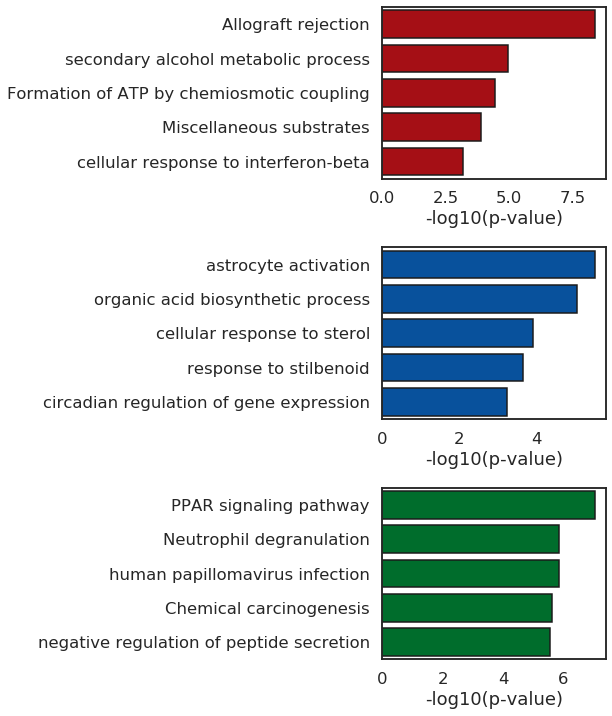

In [51]:
fig, axs = plt.subplots(3,1,figsize=(4,12))
plt.subplots_adjust(hspace=0.4)

for path, color, ax in zip(paths, colors, axs.flatten()):
    plot_top_terms_metascape(path, n_terms=5, color=color, ax=ax)
    